In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
X=df.drop("Sales",axis=1)
y=df["Sales"]

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model=LinearRegression()

In [7]:
model.fit(X,y)

LinearRegression()

In [8]:
model.intercept_

4.625124078808655

In [9]:
model.coef_

array([0.05444578, 0.10700123, 0.00033566])

In [10]:
model.score(X,y)

0.9025912899684558

we can solve the linear regression problem by using two ways, by using sklearn library and other is using ols approach.

We will not be able to build a complete model using the Ols but it is used to see the stats, and the impact of the data to the labled data.

In [21]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data=df).fit() #ordinary least squared model.
lm.summary()
#we are trying to compare sales vs TV column above.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           7.93e-74
Time:                        02:52:36   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9748      0.323     21.624      0.000       6.339       7.611
TV             0.0555      0.002     29.260      0.000       0.052       0.059
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.043
Skew:                          -0.018   Prob(JB):                        0.979
Kurtosis:                       2.938   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
lm = smf.ols(formula='Sales ~ TV+ Radio', data=df).fit() #ordinary least squared model.
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          2.39e-100
Time:                        02:53:44   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6309      0.290     15.952      0.000       4.058       5.203
TV             0.0544      0.001     39.726      0.000       0.052       0.057
Radio          0.1072      0.008     13.522      0.000       0.092       0.123
==============================================================================
Omnibus:                       16.227   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.973
Skew:                          -0.434   Prob(JB):                     8.43e-07
Kurtosis:                       4.613   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
lm = smf.ols(formula='Sales ~ TV+ Radio+Newspaper', data=df).fit() #ordinary least squared model.
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           8.13e-99
Time:                        03:10:58   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#P represents "Significance Level".


#if the P>|t|, then Ho is accepted.


#In the above data we can see that Newspaper has the 0.954 (95.4% )level of significance which means that only 4.6% of the data is contibuting. Out of 100 experiments , only 4.6 is contributing while 95.4 data is not contributing.


#But both TV and Radio is contributing completely.

#so we can see that Newspaper is only contributing 4.6% so that we can drop that column.

#we can see the R squared statistics above.


#TV= 0.812


#Radio+TV=0.903


#Radio+TV+Newspaper=0.903


Which means that newspaper is not much contributing in the model accuracy.

### R Square and Adjusted R square.

R Square= 1- (RSS/TSS)   # RSS= Residual Summation of square. # TSS= Total Summation Of Square.

Adjusted R Square= 1-[{(1-R^2)(N-1)}/(N-P-1)]  #P= No of Predictor(x1,x2,x3....,xn) and N=No of Rows

Its not always important that the increase in the feature also increases the accuracy, it might increase the accuracy by a little but it might also cause a problem of overfitting. Thats why Adjusted R square comes into the picture. It captures all the predictor and rows accordingly and help in testing along with R^2.

It will not give a overfitted kind a output.


In the previous data also, we saw that the value of R square remaind same for TV+Radio and TV+Radio+Newspaper. but the value of Adjusted R square, decreased by some point. Which adjusted the condition of overfitting.

### Multicollinearity

If the value of the relation between any two independent feature is more than 0.9 and less than -0.9 in the scale of -1 to 1 then, the fetaures are supposed to be multicollinear.

<AxesSubplot:>

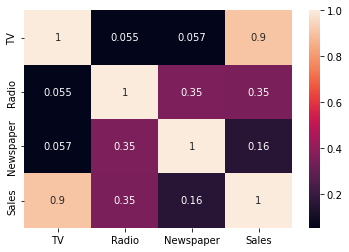

In [34]:
sns.heatmap(data=df.corr(),annot=True)

We can also find the multicollinearity using another way which is known as VIF.

VIF=Variance Inflation Factor.
VIF=1/(1-R^2)


If the VIF value is Greater than 10, we are supposed to say that the data is highly collinear.

### Regularization

controlling the total changes in m and c (degree of freedom of the m and c) by controlling the error component.

best model doesnot depends upon the more percentage of accuracy.

If a model has 90% training accuracy and 85% testing accuracy,

And a model which has 70% training accuracy and 72% testing accuracy. 

Then which model will we choose? we will definitely choose the second one.

The different Regularization Teachinques are:
1.LASSO(Least Absolute Shrinkage and Selection Operator) / L1 Regularization
2.Ridge Regression / L2 Regularization

### LASSO

L1= RSS+ λ ∑(from j=1 to n) |βj|  where λ=Shrinkage Factor, β=m

## Ridge 

L2 = RSS+ λ ∑(from j=1 to n) |βj|^2  where λ=Shrinkage Factor, β=m

## ElasticNet

In [ ]:
this will help to solve the problem of both l1 and l2 regularization